# Telecom Churn Case Study

In [112]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [113]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Loading and Understanding Data

In [114]:
#loading dataset
df=pd.read_csv('telecom_churn_data.csv')

In [115]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [116]:
# checking rows and columns
df.shape

(99999, 226)

In [117]:
#checking numerical variables
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [118]:
# info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Cleaning

#### Handling Missing Values

- divide the dataset columns into category,date,id and numerical columns

In [119]:
# categorical columns
cat_col=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [120]:
#id columns
id_cols=['mobile_number','circle_id']

In [121]:
#date columns
date_cols=[k for k in df.columns.to_list() if 'date' in k]

In [122]:
#numerical columns
num_col=[c for c in df.columns if c not in cat_col+id_cols+date_cols ] 

In [123]:
#checking the  missing value percentage of each column
nullperc=df.isnull().mean()
nullperc.sort_values(ascending=False)

arpu_3g_6                   0.748467
night_pck_user_6            0.748467
total_rech_data_6           0.748467
arpu_2g_6                   0.748467
max_rech_data_6             0.748467
fb_user_6                   0.748467
av_rech_amt_data_6          0.748467
date_of_last_rech_data_6    0.748467
count_rech_2g_6             0.748467
count_rech_3g_6             0.748467
date_of_last_rech_data_7    0.744287
total_rech_data_7           0.744287
fb_user_7                   0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
count_rech_2g_7             0.744287
av_rech_amt_data_7          0.744287
arpu_2g_7                   0.744287
count_rech_3g_7             0.744287
arpu_3g_7                   0.744287
total_rech_data_9           0.740777
count_rech_3g_9             0.740777
fb_user_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
date_of_last_rech_data_9    0.740777
night_pck_user_9            0.740777
a

In [124]:
# checking column names related with recharge column
rech_cols=[k for k in df.columns.to_list() if 'rech' in k]

In [125]:
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [126]:
# checking the recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [127]:
# observed that the recharge date and the recharge value are missing together which means the customer didn't recharge and checking the rows
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [128]:
# creating a list of recharge column where we need to impute the missing value with 0
zero_impute=['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9', 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9','max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9']

In [129]:
# impute the missing value with 0
df[zero_impute]=df[zero_impute].apply(lambda x:x.fillna(0))

In [130]:
# categorical columns replace missing values with '-1'
df[cat_col] = df[cat_col].apply(lambda x: x.fillna(-1))

In [131]:
# dropping the id columns
df=df.drop(columns=id_cols)

In [132]:
# dropping the date columns
df=df.drop(columns=date_cols)

In [133]:
# checking rows and columns
df.shape

(99999, 212)

In [134]:
# dropping all the columns where the missing value percentage is greater than .70
df=df.loc[:,df.isnull().mean()<.70]

In [135]:
# checking rows and columns
df.shape

(99999, 196)

In [136]:
# checking the null values
nullperc=df.isnull().mean()
nullperc[nullperc>0.00].sort_values(ascending=False)

ic_others_9         0.077451
std_og_t2m_mou_9    0.077451
loc_og_t2m_mou_9    0.077451
std_ic_t2f_mou_9    0.077451
loc_og_t2f_mou_9    0.077451
loc_og_t2c_mou_9    0.077451
og_others_9         0.077451
loc_og_mou_9        0.077451
std_ic_t2t_mou_9    0.077451
std_og_t2t_mou_9    0.077451
loc_ic_mou_9        0.077451
loc_og_t2t_mou_9    0.077451
std_og_t2f_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
std_og_t2c_mou_9    0.077451
std_og_mou_9        0.077451
loc_ic_t2m_mou_9    0.077451
isd_og_mou_9        0.077451
loc_ic_t2t_mou_9    0.077451
spl_og_mou_9        0.077451
std_ic_t2o_mou_9    0.077451
std_ic_t2m_mou_9    0.077451
spl_ic_mou_9        0.077451
isd_ic_mou_9        0.077451
roam_ic_mou_9       0.077451
std_ic_mou_9        0.077451
roam_og_mou_9       0.077451
onnet_mou_9         0.077451
offnet_mou_9        0.077451
spl_og_mou_8        0.053781
isd_og_mou_8        0.053781
loc_ic_t2m_mou_8    0.053781
onnet_mou_8         0.053781
std_og_t2m_mou_8    0.053781
std_og_mou_8  

In [137]:
# impute all the missing value with 0
df=df.fillna(value=0)

In [138]:
# checking null values
nullperc=df.isnull().mean()
nullperc.sort_values(ascending=False)

loc_og_t2o_mou        0.0
isd_ic_mou_6          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
isd_ic_mou_7          0.0
spl_ic_mou_9          0.0
std_og_t2o_mou        0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_9      0.0
std_ic_mou_6

In [139]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,7

## Checking High Value Customers

In [140]:
#Calculate the total recharge amount for June and July
df['total_data_rech_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_data_rech_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']

In [141]:
#Calculate the data+call recharge for June and July
df['amt_data_6']=df['total_rech_amt_6']+df['total_data_rech_6']
df['amt_data_7']=df['total_rech_amt_7']+df['total_data_rech_7']

In [142]:
#calculate the average recharge done by customer in june and july
df['avg_amount_6_7']=(df.amt_data_6+df.amt_data_7)/2

In [143]:
# checking the 70 percentile of recharge amount
df['avg_amount_6_7'].quantile(0.7)

478.0

In [144]:
# filtering the customer who recharged more than or equal to 70 percentile amount which is our high value customer
df=df[df['avg_amount_6_7']>=df['avg_amount_6_7'].quantile(0.7)]
df.shape

(30001, 201)

In [145]:
# dropping derived columns
df=df.drop(columns=['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7','avg_amount_6_7'])

In [146]:
# checcking rows and columns
df.shape

(30001, 196)

In [147]:
# calculating total incoming and outgoing mou
df['total_callmou_9']=df['total_ic_mou_9']+df['total_og_mou_9']

In [148]:
#calculating 2g and 3g data consumption
df['total_vol_mb_9']=df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [149]:
# create target variable by checking the customer who havent consumed data or call
df['churn']=np.where((df['total_callmou_9']==0)&(df['total_vol_mb_9']==0),1,0)

In [150]:
# dropping derived columns
df=df.drop(columns=['total_callmou_9','total_vol_mb_9'])

In [151]:
# checking churn datatype
df.churn.dtype

dtype('int32')

In [152]:
# changing datatype from int to categorical type
df.churn=df.churn.astype('category')

In [153]:
#churn datatype
df.churn.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

###### checking the difference between the 8th month and the average of june and july.

In [154]:
df['arpu_diff']=df['arpu_8']-((df['arpu_6']+df['arpu_7'])/2)

In [155]:
df['onnet_mou_diff']=df['onnet_mou_8']-((df['onnet_mou_6']+df['onnet_mou_7'])/2)

In [156]:
df['offnet_mou_diff']=df['offnet_mou_8']-((df['offnet_mou_6']+df['offnet_mou_7'])/2)

In [157]:
df['roam_ic_diff']=df['roam_ic_mou_8']-((df['roam_ic_mou_6']+df['roam_ic_mou_7'])/2)

In [158]:
df['roam_og_diff']=df['roam_og_mou_8']-((df['roam_og_mou_6']+df['roam_og_mou_7'])/2)

In [159]:
df['loc_og_mou_diff']=df['loc_og_mou_8']-((df['loc_og_mou_6']+df['loc_og_mou_7'])/2)

In [160]:
df['loc_ic_mou_diff']=df['loc_ic_mou_8']-((df['loc_ic_mou_6']+df['loc_ic_mou_7'])/2)

In [161]:
df['std_og_mou_diff']=df['std_og_mou_8']-((df['std_og_mou_6']+df['std_og_mou_7'])/2)

In [162]:
df['std_ic_mou_diff']=df['std_ic_mou_8']-((df['std_ic_mou_6']+df['std_ic_mou_7'])/2)

In [163]:
df['isd_og_mou_diff']=df['isd_og_mou_8']-((df['isd_og_mou_6']+df['isd_og_mou_7'])/2)

In [164]:
df['isd_ic_mou_diff']=df['isd_ic_mou_8']-((df['isd_ic_mou_6']+df['isd_ic_mou_7'])/2)

In [165]:
df['spl_og_mou_diff']=df['spl_og_mou_8']-((df['spl_og_mou_6']+df['spl_og_mou_7'])/2)

In [166]:
df['spl_ic_mou_diff']=df['spl_ic_mou_8']-((df['spl_ic_mou_6']+df['spl_ic_mou_7'])/2)

In [167]:
df['total_og_mou_diff']=df['total_og_mou_8']-((df['total_og_mou_6']+df['total_og_mou_7'])/2)

In [168]:
df['total_ic_mou_diff']=df['total_ic_mou_8']-((df['total_ic_mou_6']+df['total_ic_mou_7'])/2)

In [169]:
df['total_rech_num_diff']=df['total_rech_num_8']-((df['total_rech_num_6']+df['total_rech_num_7'])/2)

In [170]:
df['total_rech_amt_diff']=df['total_rech_amt_8']-((df['total_rech_amt_6']+df['total_rech_amt_7'])/2)

In [171]:
df['total_rech_data_diff']=df['total_rech_data_8']-((df['total_rech_data_6']+df['total_rech_data_7'])/2)

In [172]:
df['max_rech_amt_diff']=df['max_rech_amt_8']-((df['max_rech_amt_6']+df['max_rech_amt_7'])/2)

In [173]:
df['max_rech_data_diff']=df['max_rech_data_8']-((df['max_rech_data_6']+df['max_rech_data_7'])/2)

In [174]:
df['av_rech_amt_data_diff']=df['av_rech_amt_data_8']-((df['av_rech_amt_data_6']+df['av_rech_amt_data_7'])/2)

In [175]:
df['vol_2g_mb_diff']=df['vol_2g_mb_8']-((df['vol_2g_mb_6']+df['vol_2g_mb_7'])/2)

In [176]:
df['vol_3g_mb_diff']=df['vol_3g_mb_8']-((df['vol_3g_mb_6']+df['vol_3g_mb_7'])/2)

In [177]:
# checking the 9th month columns
del_col = [col for col in df.columns.to_list() if '_9' in col]
print(del_col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [178]:
# dropping the 9th month columns
df=df.drop(columns=del_col,axis=1)

In [179]:
# removing 9th month column from categorical columns
cat_col=['churn','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [180]:
# updating numerical columns
num_col=[c for c in df.columns if c not in cat_col+id_cols+date_cols ] 

In [181]:
# checking rows and columns
df.shape

(30001, 173)

## EDA

In [182]:
# taking the derived columns where we checked the difference between 8th month and average of june and july
diff_col = [col for col in df.columns.to_list() if '_diff' in col]

In [183]:
# change churn datatype to numeric
df['churn'] = pd.to_numeric(df['churn'])

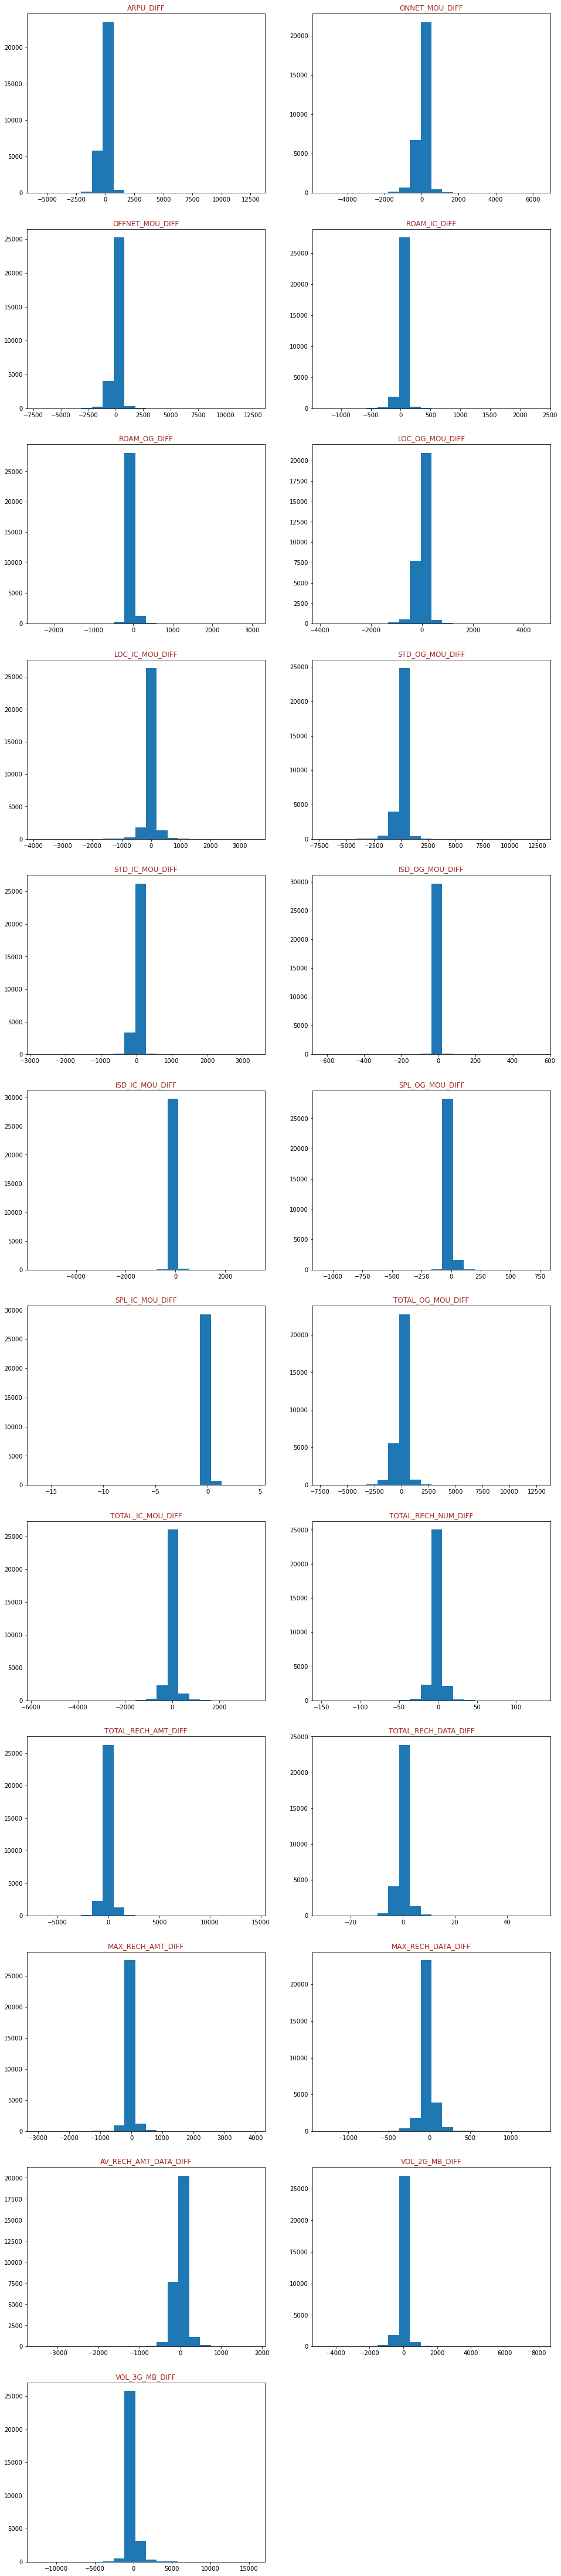

In [184]:
# Plotting graphs for numerical variables
count=1
plt.subplots(figsize=(16,80))
for col in diff_col:
    plt.subplot(12,2,count)
    plt.title(col.upper(),{'fontsize':12,'fontweight':4,'color':'brown'})
    plt.hist(df[col],bins=20)
    plt.xlabel("")
    count+=1
plt.show() 

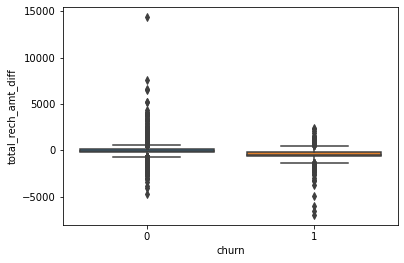

In [185]:
sns.boxplot(y='total_rech_amt_diff',x='churn',data=df)
plt.show()

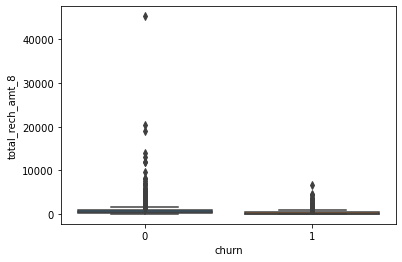

In [186]:
sns.boxplot(y='total_rech_amt_8',x='churn',data=df)
plt.show()

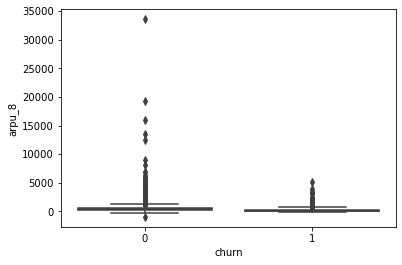

In [187]:
sns.boxplot(y='arpu_8',x='churn',data=df)
plt.show()

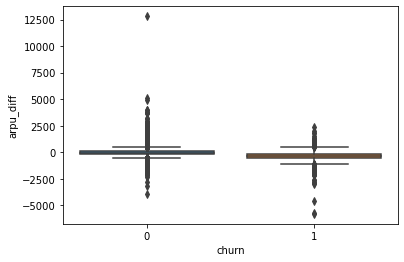

In [188]:
sns.boxplot(y='arpu_diff',x='churn',data=df)
plt.show()

-- its clear from the above boxplot graphs that for churned customersthe average revenue and total recharge amount are around zero

In [189]:
#creating def to remove the outliers
def check_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [190]:
# removing outliers for numeric columns
df[num_col] = df[num_col].apply(check_outliers, axis=0)

## Modelling

In [191]:
# change churn datatype to numeric
df['churn'] = pd.to_numeric(df['churn'])

In [192]:
df.churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

- its very clear from the above data that class is imbalanced, so we need to handle class imbalance in modelling steps

In [193]:
# Import library
from sklearn.model_selection import train_test_split

In [194]:
#split into X and y
X = df.drop(['churn'], axis=1)
y = df['churn']

In [195]:
# Splitting data into train and test 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=4, stratify=y)

## PCA

In [196]:
# importing packages
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [197]:
# apply pca to train data using pipeline
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
# fit the model
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [198]:
pca = pca.named_steps['pca']

# checking the explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.60
1       21.00
2       26.81
3       31.71
4       35.79
5       39.51
6       42.23
7       44.79
8       47.10
9       49.23
10      51.27
11      53.18
12      54.98
13      56.69
14      58.29
15      59.75
16      61.12
17      62.47
18      63.81
19      65.11
20      66.30
21      67.47
22      68.59
23      69.67
24      70.70
25      71.66
26      72.62
27      73.54
28      74.44
29      75.32
30      76.19
31      77.01
32      77.81
33      78.60
34      79.35
35      80.08
36      80.79
37      81.48
38      82.13
39      82.78
40      83.39
41      83.95
42      84.50
43      85.04
44      85.57
45      86.08
46      86.57
47      87.05
48      87.51
49      87.95
50      88.37
51      88.76
52      89.13
53      89.49
54      89.85
55      90.19
56      90.52
57      90.85
58      91.18
59      91.50
60      91.81
61      92.10
62      92.39
63      92.67
64      92.94
65      93.22
66      93.48
67      93.73
68      93.97
69      94.21
70      94.43
71    

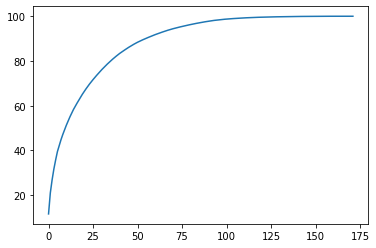

In [199]:
# plot for explained variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.plot(cumulative_variance)

- we can see from the graph that after 60 it is almost stable, so choosing 60 as PCA component

## PCA & Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [201]:
# fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [202]:
# import libraries
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

- Evaluation on test data

In [203]:
# predict on train data
y_train_pred = pipeline.predict(X_train)
# predict on test data
y_test_pred = pipeline.predict(X_test)

# checking Accuracy
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_test_pred))

# checking confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy on train data: 0.8173333333333334
Accuracy on test data: 0.8142914278096254
[[5586 1305]
 [  88  522]]
Sensitivity: 0.86
Specificity: 0.81
AUC: 0.9


#### Logistic Regression using Hyperparameter tuning

In [204]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)
params = {'pca__n_components': [60, 80], 'logistic__C': [0.01,0.1,1, 3, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

LR_model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [205]:
# fit the model
LR_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 3, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [206]:
print("Best hyperparameters: ", LR_model.best_params_)

Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [207]:
# predict on train data
y_train_pred = LR_model.predict(X_train)
# predict on test data
y_test_pred = LR_model.predict(X_test)

# check Accuracy
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_test_pred))

# check confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = LR_model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy on train data: 0.8510666666666666
Accuracy on test data: 0.8466871083855486
[[5845 1046]
 [ 104  506]]
Sensitivity: 0.83
Specificity: 0.85
AUC: 0.91


## Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
# random forest - the class weight is used to handle class imbalance
dt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params ={'max_depth': [5, 10, 20],
    'min_samples_leaf': [50, 100,150],
    'criterion': ["gini", "entropy"]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
RF_model = GridSearchCV(estimator=dt, cv=4, param_grid=params, n_jobs=-1, verbose=1, scoring='roc_auc')

In [209]:
# fit model
RF_model.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [210]:
score_df = pd.DataFrame(RF_model.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,12.700024,0.519030,0.830814,0.279959,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.933430,0.912436,0.924380,0.918263,0.922127,0.007773,12
1,11.866795,0.679159,1.168324,0.335647,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.931798,0.912697,0.923399,0.918111,0.921502,0.007047,15
2,11.865171,0.428742,1.405223,0.377896,gini,5,150,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.932091,0.910747,0.921964,0.915936,0.920185,0.007938,18
3,20.841788,0.351615,1.452461,0.555549,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.937374,0.917171,0.929877,0.920754,0.926294,0.007898,4
4,19.375361,0.720691,1.731402,0.397040,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.934095,0.914618,0.926325,0.919875,0.923728,0.007281,8


In [211]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,29.643318,0.461907,2.017861,0.442910,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.938260,0.919282,0.932811,0.921506,0.927965,0.007852,1
12,28.291820,0.709219,1.768739,0.457838,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937657,0.919106,0.929592,0.921711,0.927016,0.007256,2
6,23.328721,0.300645,1.621265,0.379079,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.937435,0.918266,0.930234,0.921484,0.926855,0.007516,3
3,20.841788,0.351615,1.452461,0.555549,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.937374,0.917171,0.929877,0.920754,0.926294,0.007898,4
16,26.659860,0.499051,1.998619,0.477261,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.935968,0.917585,0.926731,0.919990,0.925068,0.007130,5


In [212]:
RF_best=RF_model.best_estimator_
RF_best

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=20, min_samples_leaf=50, n_jobs=-1)

In [213]:
# predict on test data
y_train_pred = RF_best.predict(X_train)
y_test_pred = RF_best.predict(X_test)

# check Accuracy
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_test_pred))

# check confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = RF_best.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy on train data: 0.9243111111111111
Accuracy on test data: 0.9146780429276097
[[6400  491]
 [ 149  461]]
Sensitivity: 0.76
Specificity: 0.93
AUC: 0.93


## Insights
- model developed using Randon forest has high accuracy on train and test data.so this is our best model.

## Important features

In [214]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": RF_best.feature_importances_
})

In [215]:
imp_df.sort_values(by="Imp", ascending=False).reset_index(drop=True)

,Varname,Imp
0,loc_ic_t2m_mou_8,6.126794e-02
1,loc_ic_mou_8,5.611820e-02
2,total_ic_mou_8,5.203693e-02
3,total_og_mou_8,4.394555e-02
4,loc_ic_t2t_mou_8,4.301047e-02
5,loc_og_mou_8,4.266875e-02
6,last_day_rch_amt_8,4.033732e-02
7,arpu_diff,3.604261e-02
8,loc_og_t2t_mou_8,3.386293e-02
9,total_rech_amt_diff,2.918510e-02


In [216]:
imp_df.sort_values(by="Imp", ascending=False).reset_index(drop=True).Varname[0:10]

0       loc_ic_t2m_mou_8
1           loc_ic_mou_8
2         total_ic_mou_8
3         total_og_mou_8
4       loc_ic_t2t_mou_8
5           loc_og_mou_8
6     last_day_rch_amt_8
7              arpu_diff
8       loc_og_t2t_mou_8
9    total_rech_amt_diff
Name: Varname, dtype: object

In [217]:
# splitting the dataset to churn and non churn
target_0 = df.loc[df['churn'] == 0]
target_1 = df.loc[df['churn'] == 1]

In [218]:
# top 10 features
top_10=imp_df.sort_values(by="Imp", ascending=False).reset_index(drop=True).Varname[0:10]

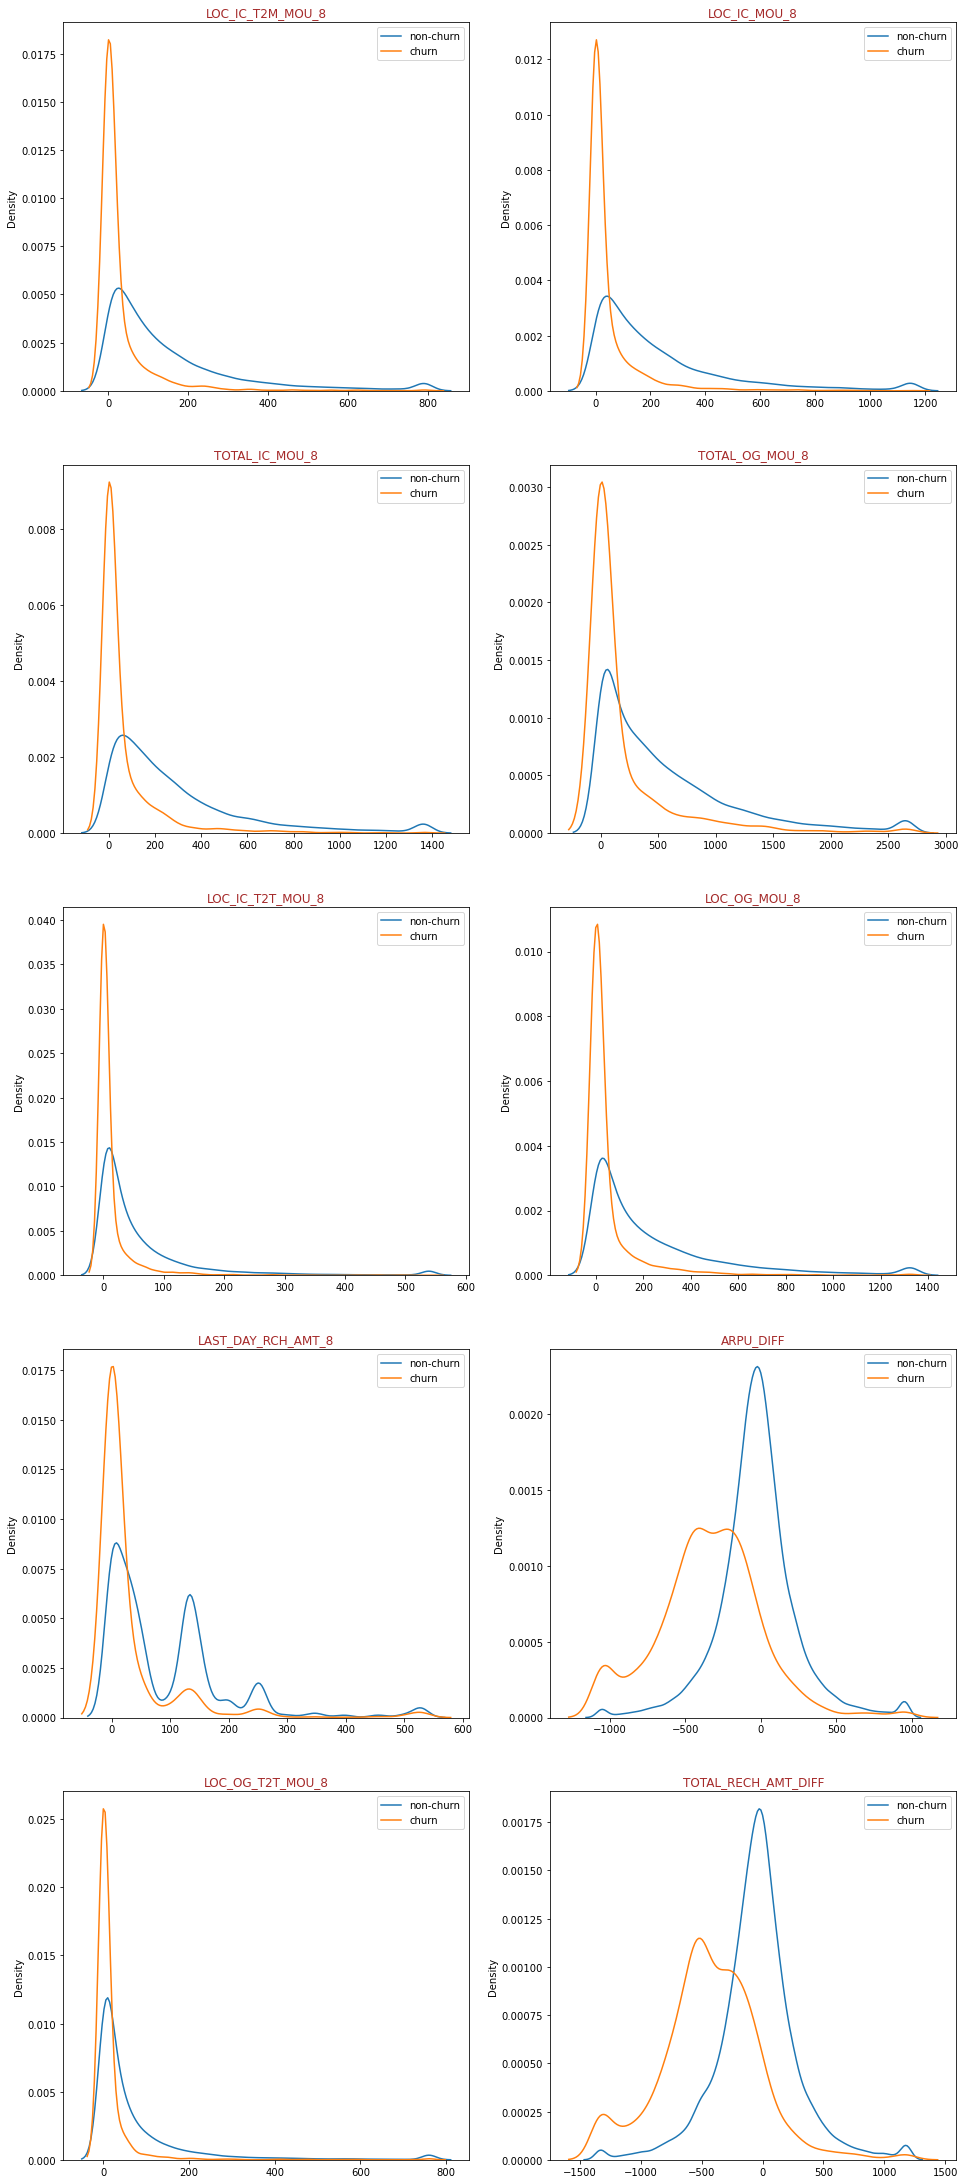

In [219]:
# plotting the graph for top 10 features Vs churn/non-churn
count=1
plt.subplots(figsize=(16,80))
for col in top_10:
    plt.subplot(10,2,count)
    plt.title(col.upper(),{'fontsize':12,'fontweight':4,'color':'brown'})
    sns.distplot(target_0[col], hist=False, label="non-churn")
    sns.distplot(target_1[col], hist=False, label="churn") 
    plt.xlabel("")
    count+=1
    plt.legend()
plt.show() 

- from the above graphs its clear that the churn customers are more densed around zero and non-churn customers spread across the graph

## Insights:
- Top 10 features, the telecom company needs to pay attention in action phase are:
    

In [220]:
top_10

0       loc_ic_t2m_mou_8
1           loc_ic_mou_8
2         total_ic_mou_8
3         total_og_mou_8
4       loc_ic_t2t_mou_8
5           loc_og_mou_8
6     last_day_rch_amt_8
7              arpu_diff
8       loc_og_t2t_mou_8
9    total_rech_amt_diff
Name: Varname, dtype: object

- the company needs to check the incoming and outgoing minutes of usage of customers.If the usage is coming down, provide some offers or package to retain the topcustomers.
- Provide offers for STD packages as well to retain the customers